In [16]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# Set the paths for your dataset
train_dir = './../Datasets/train'
test_dir = './../Datasets/test'

# Define image dimensions and other parameters
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
epochs = 5
batch_size = 32


In [18]:
# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)


In [19]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False


In [20]:
# Create a new model on top of the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                      

In [22]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

Found 3663 images belonging to 2 classes.
Found 2085 images belonging to 2 classes.


In [24]:
# Train the model
history=model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs, validation_data=test_generator, validation_steps=test_generator.samples // batch_size)

Epoch 1/5
114/114 [==============================] - 479s 4s/step - loss: 0.0966 - accuracy: 0.9623 - val_loss: 0.0988 - val_accuracy: 0.9543
Epoch 2/5
114/114 [==============================] - 463s 4s/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.1822 - val_accuracy: 0.9303
Epoch 3/5
114/114 [==============================] - 1306s 12s/step - loss: 0.0175 - accuracy: 0.9959 - val_loss: 0.1837 - val_accuracy: 0.9279
Epoch 4/5
114/114 [==============================] - 547s 5s/step - loss: 0.0133 - accuracy: 0.9948 - val_loss: 0.1290 - val_accuracy: 0.9442
Epoch 5/5
114/114 [==============================] - 591s 5s/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.2896 - val_accuracy: 0.9125


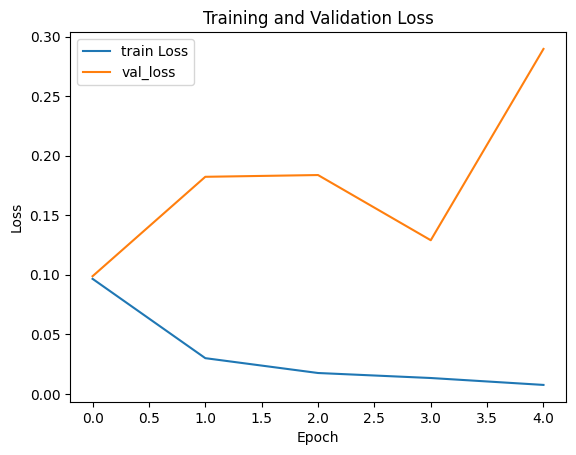

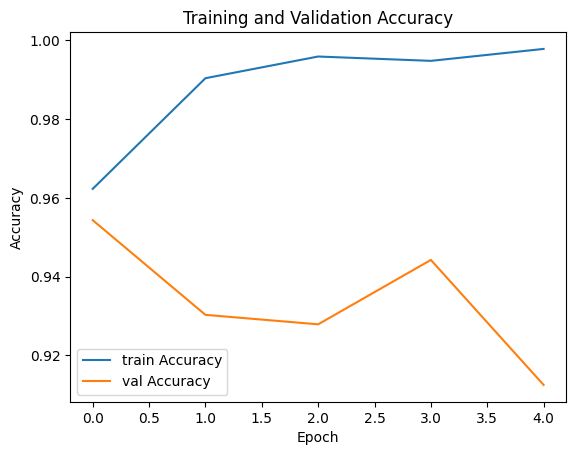

In [25]:
import matplotlib.pyplot as plt

# ... Your model training code here ...

# Plot and save the loss plot
plt.plot(history.history['loss'], label='train Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('./../Images/loss_plot_model2.png')
plt.show()

# Plot and save the accuracy plot
plt.plot(history.history['accuracy'], label='train Accuracy')
plt.plot(history.history['val_accuracy'], label='val Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('./../Images/accuracy_plot_model2.png')
plt.show()

In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Function to preprocess an image before feeding it to the model
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values to [0, 1]
    return img_array

# Function to make predictions
def predict_image(model, img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Rick"
    else:
        return "Morty"

# Example usage
new_image_path = './../Datasets/test/Rick/1_E10_890181.jpg'  # Replace with the path to your new image
prediction_result = predict_image(model, new_image_path)
print(f"The model predicts: {prediction_result}")

1/1 [==============================] - 0s 424ms/step
The model predicts: Rick
